Лабораторийн ажил №8
Гүйцэтгэсэн - В221960039 Т. Хулан


In [ ]:
#Хэрэгтэй сангуудаа импортлоно
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
import networkx as nx  # NetworkX санг импортлож байна (графтай ажиллахад хэрэглэгдэнэ)

def read_net_w(filename):
    g = nx.Graph()  # Хоосон граф үүсгэж байна
    with open(filename) as f:  # Файлыг уншилтын горимоор нээж байна
        f.readline()  # Эхний мөрийг (header) алгасаж байна
        for l in f:  # Файлын үлдсэн мөрүүдийг ээлжлэн уншиж байна
            l = l.split(",")  # Мөрийг таслалаар хувааж жагсаалт болгоно
            g.add_edge(l[0], l[1], weight=int(l[2]))  # Хоёр зангилааны хооронд ирмэг нэмээд жинг нь оноож байна
    return g  # Үүсгэсэн графыг буцаана

# Game of Thrones өгөгдөл унших хэсэг
season = 6  # 6-р улирлын өгөгдлийг уншина
g = read_net_w(f'/content/drive/MyDrive/got-s6-edges.csv')  # Файлаас өгөгдөл уншиж, граф үүсгэнэ


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bridges and Local Bridges

In [ ]:
nx.has_bridges(g)  # Графд гүүр (bridge) ирмэг байгаа эсэхийг шалгана


True

Generating all bridges in the graph

In [ ]:
list(nx.bridges(g))  # Граф дахь бүх гүүр (bridge) ирмэгүүдийг жагсаалтад хувиргана


[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

Generating all local bridges in the graph and computing the span (i.e., the shortest path length between the endpoints if the local bridge is removed)

In [ ]:
list(nx.local_bridges(g, with_span=True))  # Граф дахь бүх локал гүүр ирмэгүүдийг span утгатай нь хамт жагсаалт болгоно


[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

## Tie Strength

Measuring Tie Strength for each pair of nodes in the graph through Neighborhood Overlap

In [ ]:
def node_overlap(g):  # Графын ирмэг бүрийн хөршүүдийн давхцлыг тооцоолох функц
    for u, v in g.edges():  # Графын бүх ирмэгүүдийг (u, v) хосоор нь авч давталт хийж байна
        n_u = set(g.neighbors(u))  # u зангилааны хөршүүдийг олонлог (set) хэлбэрээр авна
        n_v = set(g.neighbors(v))  # v зангилааны хөршүүдийг олонлог (set) хэлбэрээр авна
        overlap = len(n_u & n_v) / len(n_u | n_v)  # u болон v-ийн хөршүүдийн давхцлын коэффициентийг тооцоолно
        # n_u & n_v → u ба v-гийн нийтлэг хөршүүдийн олонлог (intersection)
        # n_u | n_v → u ба v-гийн бүх хөршүүдийн олонлог (union)
        # Томьёо: overlap(u, v) = |N(u) ∩ N(v)| / |N(u) ∪ N(v)|
        g[u][v]['overlap'] = overlap  # Тооцоолсон давхцлын утгыг тухайн ирмэгийн шинж чанар (attribute) болгон хадгална
    return g  # Давхцлын утгуудыг агуулсан шинэчилсэн графыг буцаана


In [ ]:
g = node_overlap(g)  # Графын бүх ирмэгүүдийн хөршүүдийн давхцлын коэффициентийг тооцоолж, шинэчлэгдсэн графыг хадгална


Plotting the KDE (Kernel Density Estimation) of Neighborhood Overlap

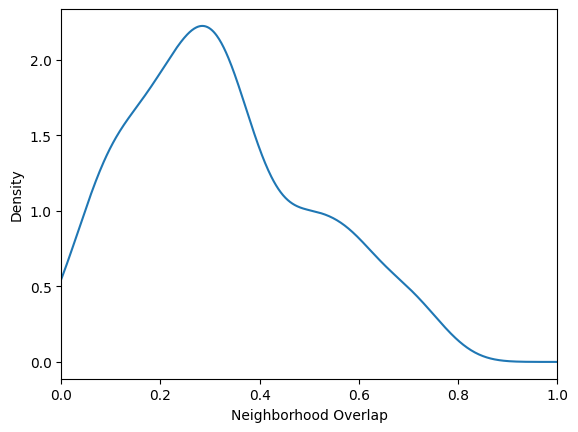

In [ ]:


weights = [e[-1]['overlap'] for e in g.edges(data=True)]  # Графын бүх ирмэгүүдээс 'overlap' утгыг агуулсан жагсаалт үүсгэнэ
# g.edges(data=True) → Ирмэгүүдийн мэдээлэл (node1, node2, {атрибутууд}) хэлбэртэй буцна
# e[-1]['overlap'] → Ирмэгийн атрибут dictionary-с 'overlap' утгыг авна

pd.DataFrame(weights)[0].plot.kde()  # Давхцлын коэффициентийн тархалтыг kernel density estimation (KDE) хэлбэрээр зурна
plt.xlabel("Neighborhood Overlap")  # X тэнхлэгийн шошго
plt.xlim(0,1)  # X тэнхлэгийг 0-1 хооронд хязгаарлана (Учир нь Neighborhood Overlap үргэлж 0-1 хооронд байна)
plt.show()  # Графикийг дэлгэцэнд харуулна


Plotting the KDE (Kernel Density Estimation) of Interactions Weights

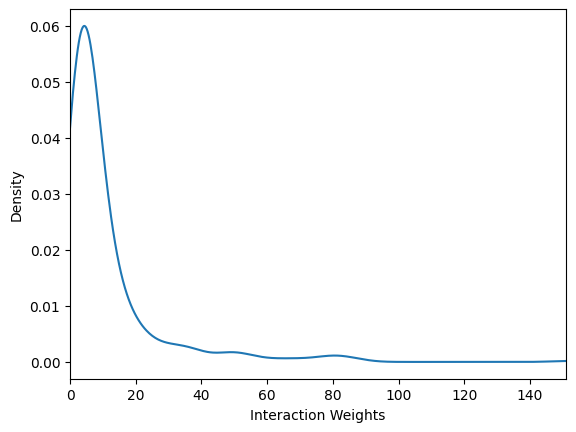

In [ ]:
weights_got = [d['weight'] for u,v,d in g.edges(data=True)]  # Графын бүх ирмэгүүдээс 'weight' утгыг агуулсан жагсаалт үүсгэнэ
# g.edges(data=True) → Ирмэгүүдийн мэдээлэл (node1, node2, {атрибутууд}) хэлбэртэй буцна
# d['weight'] → Ирмэгийн атрибут dictionary-с 'weight' утгыг авна

pd.DataFrame(weights_got)[0].plot.kde()  # 'weight' утгуудын тархалтыг kernel density estimation (KDE) хэлбэрээр зурна
plt.xlabel("Interaction Weights")  # X тэнхлэгийн шошго
plt.xlim(0, max(weights_got))  # X тэнхлэгийг 0-оос 'weights_got' жагсаалтын хамгийн их утга хүртэл хязгаарлана
plt.show()  # Графикийг дэлгэцэнд харуулна


Generating Networks

In [ ]:
# Random
er = nx.erdos_renyi_graph(1000, 0.001)  # Эрдös-Реньи (Erdős–Rényi) санамсаргүй граф үүсгэнэ
# 1000 зангилаатай, 0.001 гэж заасан холбоос үүсгэх магадлалтай санамсаргүй графийг үүсгэдэг.

# Scale-free
ba = nx.barabasi_albert_graph(1000, 2)  # Барабаси-Альберт (Barabási–Albert) масштабын чөлөөт (scale-free) граф үүсгэнэ
# 1000 зангилаатай, шинэ зангилаа бүрд хоёр шинэ ирмэг нэмдэг масштабын чөлөөт графийг үүсгэдэг.


Computing node degree for both ER and BA Networks

In [ ]:
er_degs = list(dict(er.degree()).values())  # Эрдös-Реньи графын бүх зангилааны төгсгөлийн тоог жагсаалт болгон хөрвүүлнэ
# er.degree() → Графын зангилаануудын төгсгөлийн тоог буцаадаг (node, degree)-ийн хосууд
# dict(er.degree()) → (node, degree) хосуудыг dictionary хэлбэрт хөрвүүлнэ
# .values() → Dictionary-ийн бүх утгуудыг авна (degree буюу төгсгөлийн тоо)
# list() → Эдгээр утгуудыг жагсаалт (list) болгож хөрвүүлнэ

ba_degs = list(dict(ba.degree()).values())  # Барабаси-Альберт графын бүх зангилааны төгсгөлийн тоог жагсаалт болгон хөрвүүлнэ
# ba.degree() → Графын зангилаануудын төгсгөлийн тоог буцаадаг (node, degree)-ийн хосууд
# dict(ba.degree()) → (node, degree) хосуудыг dictionary хэлбэрт хөрвүүлнэ
# .values() → Dictionary-ийн бүх утгуудыг авна (degree буюу төгсгөлийн тоо)
# list() → Эдгээр утгуудыг жагсаалт (list) болгож хөрвүүлнэ


Defining Molloy-Reed threshold

In [ ]:
def molloy_reed(degrees):
    # Molloy-Reed загварын тооцоолол. Энэ нь графын уналтын түвшний тооцоог хийхэд ашиглагддаг.
    # degrees → Зангилаануудын төгсгөлийн тоо агуулсан жагсаалт эсвэл массив
    return (np.mean(degrees)*(np.mean(degrees)+1))/np.mean(degrees)
    # Төгсгөлийн тооны дундажийг авч, Molloy-Reed загварыг ашиглан K утгыг тооцоолдог.
    # K = (Mean degree * (Mean degree + 1)) / Mean degree

def breakdown_threshold(degrees):
    # Графын уналтын хязгаар (breakdown threshold) тооцоолох функц
    K = molloy_reed(degrees)  # Molloy-Reed тооцоололоос K утгыг авна
    return 1 - (1/(K-1))  # Уналтын хязгаарын томьёо: 1 - (1 / (K - 1))


Random network

In [ ]:
molloy_reed(er_degs)
# Эрдös-Реньи графын төгсгөлийн тоо (er_degs) дээр Molloy-Reed загварыг ашиглан K утгыг тооцоолж байна


np.float64(1.992)

In [ ]:
breakdown_threshold(er_degs)
# Эрдös-Реньи графын төгсгөлийн тоо (er_degs) дээр уналтын хязгаарыг (breakdown threshold) тооцоолж байна


np.float64(-0.008064516129032251)

Scale-free network

In [ ]:
molloy_reed(ba_degs)
# Барабаси-Альберт графын төгсгөлийн тоо (ba_degs) дээр Molloy-Reed загварыг ашиглан K утгыг тооцоолж байна


np.float64(4.992)

In [ ]:
breakdown_threshold(ba_degs)
# Барабаси-Альберт графын төгсгөлийн тоо (ba_degs) дээр уналтын хязгаарыг (breakdown threshold) тооцоолж байна


np.float64(0.7494989979959921)

### Random Failures

In [ ]:
def random_node(g):
    # Санамсаргүй зангилаа сонгох функц
    return [np.random.choice(g.nodes())]  # Санамсаргүй сонгосон нэг зангилааг буцаана

def dismantle(g, function, **args):
    # Графаас зангилааг поэтап устгаж, холбогдсон бүрэлдэхүүн хэсгүүдийн хэмжээг тооцоолох функц
    total_nodes = g.number_of_nodes()  # Графын нийт зангилааны тоог авна
    removed_nodes = []  # Устгасан зангилаануудын хувь
    components = []  # Холбогдсон бүрэлдэхүүн хэсгүүдийн хэмжээг хадгалах
    while len(g.nodes()) > 1:  # Графад хоёр ба түүнээс дээш зангилаа үлдсэн байх тохиолдолд
        n = function(g, **args)[0]  # Функцаас сонгосон нэг зангилааг авна
        g.remove_node(n)  # Сонгосон зангилааг устгана
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)  # Устгасан зангилааны хувийг тооцоолно
        comps = list(nx.connected_components(g))  # Холбогдсон бүрэлдэхүүн хэсгүүдийг авна
        g_size = 0  # Графын хэмжээ
        if len(comps) > 0:
            g_size = max([len(c) for c in comps]) / total_nodes  # Хамгийн том бүрэлдэхүүн хэсгийн хэмжээг тооцоолно
        components.append(g_size)  # Графын хэмжээний хувь (хамгийн том бүрэлдэхүүн хэсэг)
    return removed_nodes, components  # Устгасан зангилаанууд болон бүрэлдэхүүн хэсгүүдийн хэмжээг буцаана

def get_sorted_nodes(g, score, reverse=True):
    # Зангилаануудыг тогтоосон оноогоор эрэмбэлэх функц
    nodes = score(g)  # score функцээс зангилаануудын оноог авна
    if isinstance(nodes, dict):  # Хэрэв үүнийг dict хэлбэрээр буцаасан бол
        nodes = [(k, v) for k, v in nodes.items()]  # (node, score) хосоор жагсаалтыг үүсгэнэ
    srt = sorted(nodes, key=lambda k: k[1], reverse=reverse)  # Эдгээр зангилаануудыг онооны дагуу эрэмбэлнэ
    return [x[0] for x in srt]  # Зангилаануудын жагсаалтыг буцаана

def plot_dismantle(x, y):
    # Устгасан зангилаанууд болон бүрэлдэхүүн хэсгийн хэмжээг графикаар дүрслэх функц
    plt.plot(x, y)  # x ба y мэдээллийг график дээр зурна
    plt.xlabel("Removed Nodes")  # X тэнхлэгийн шошго
    plt.ylabel("Giant Component size")  # Y тэнхлэгийн шошго
    plt.show()  # Графикийг дэлгэцэнд харуулна


Random Failure:
- Giant component size has a consistent decrease when a big fraction of nodes is removed

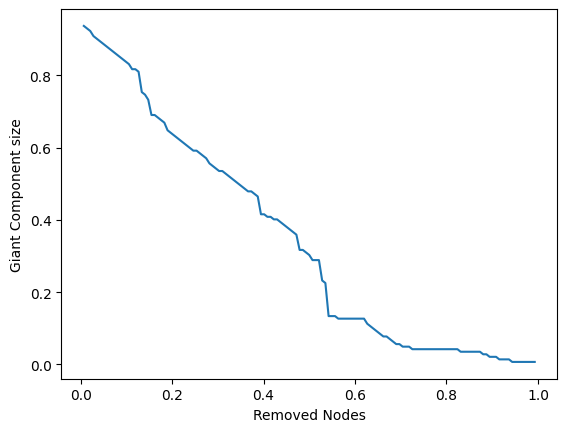

In [ ]:
h = g.copy()  # Оригиналь графыг хуулах, ингэснээр бид эхний графыг өөрчлөхгүйгээр туршилт хийж болно
rn, comps = dismantle(h, random_node)  # Санамсаргүй зангилаа устгах, устгасан зангилаануудын хувь болон бүрэлдэхүүн хэсгүүдийн хэмжээг буцаах
plot_dismantle(rn, comps)  # Устгасан зангилаануудын хувь (rn) болон хамгийн том бүрэлдэхүүн хэсгийн хэмжээ (comps)-ийн графикийг гаргах


### Targeted Attacks

Targeted Node attack (hubs are removed first)
- Giant component size has a consistent decrease when a small fraction of nodes is removed

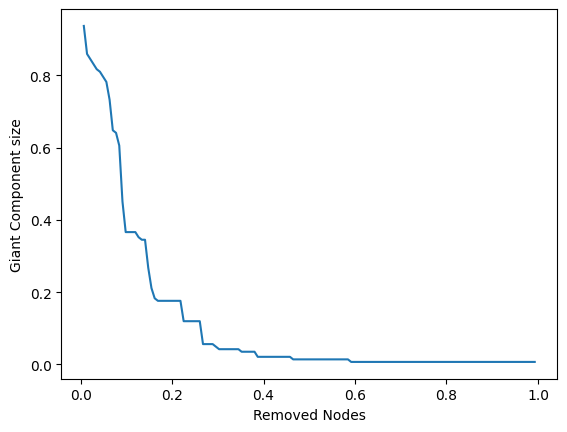

In [ ]:
h = g.copy()  # Оригиналь графыг хуулах, ингэснээр бид эхний графыг өөрчлөхгүйгээр туршилт хийж болно
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)  # Зангилаануудыг тэдний төгсгөлийн тоо (degree)-оор эрэмбэлж устгах
plot_dismantle(rn, comps)  # Устгасан зангилаануудын хувь (rn) болон хамгийн том бүрэлдэхүүн хэсгийн хэмжээ (comps)-ийн графикийг гаргах


Targeted Edge Attack (based on Edge Betweenness Centrality)
- Giant component size has a consistent decrease when a small fraction of nodes is removed

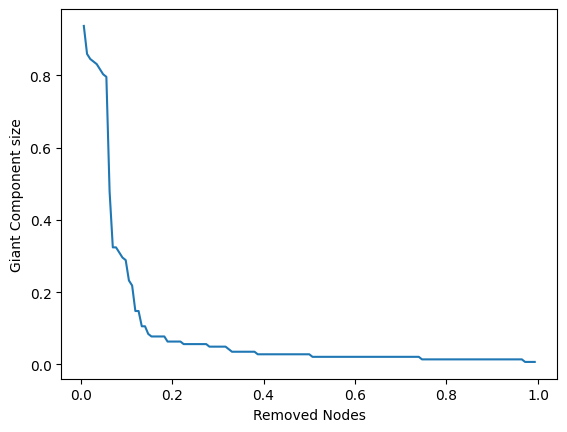

In [ ]:
h = g.copy()  # Оригиналь графыг хуулах, ингэснээр бид эхний графыг өөрчлөхгүйгээр туршилт хийж болно
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)  # Зангилаануудыг тэдний харгалзах "betweenness centrality" оноо дээр эрэмбэлж устгах
plot_dismantle(rn, comps)  # Устгасан зангилаануудын хувь (rn) болон хамгийн том бүрэлдэхүүн хэсгийн хэмжээ (comps)-ийн графикийг гаргах


Targeted Edge Attack (based on Edge Harmonic Centrality)
- Giant component size has a consistent decrease when a small fraction of nodes is removed

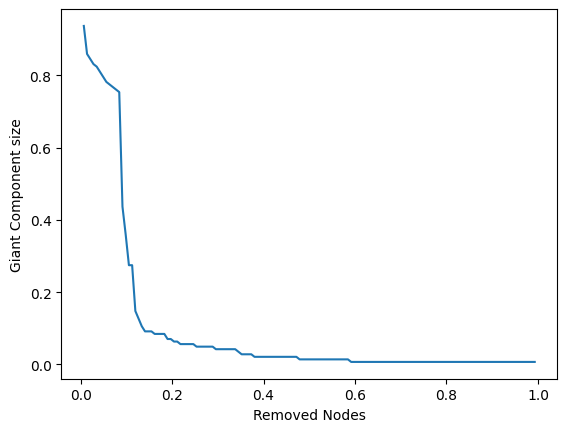

In [ ]:
h = g.copy()  # Оригиналь графыг хуулах, ингэснээр бид эхний графыг өөрчлөхгүйгээр туршилт хийж болно
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)  # Зангилаануудыг тэдний "harmonic centrality" оноо дээр эрэмбэлж устгах
plot_dismantle(rn, comps)  # Устгасан зангилаануудын хувь (rn) болон хамгийн том бүрэлдэхүүн хэсгийн хэмжээ (comps)-ийн графикийг гаргах


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GCNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, X, A):
        # 1. Өөрөө өөрийгөө холбосон adjacency матриц үүсгэх
        I = torch.eye(A.size(0)).to(A.device)
        A_hat = A + I

        # 2. Зэрэгийн матрицыг тооцоолох
        D_hat = torch.diag(torch.sum(A_hat, dim=1))

        # 3. Нормалчлагдсан adjacency матрицыг тооцоолох
        D_hat_inv_sqrt = torch.inverse(torch.sqrt(D_hat))
        A_hat_norm = torch.mm(torch.mm(D_hat_inv_sqrt, A_hat), D_hat_inv_sqrt)

        # 4. GCN хөрвүүлэлт хийх
        out = torch.mm(A_hat_norm, X)  # Графын мэдээллийг нэгтгэх
        out = self.linear(out)  # Шугаман хувиргалт хийх
        return F.relu(out)  # ReLU активэйшн функц ашиглах
